In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import csv
%matplotlib inline

In [2]:
# Read Meteorite_Landings.csv file
meteorite_landings_df = pd.read_csv('Meteorite_Landings_yukiekajita.csv')
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [3]:
meteorite_landings_df['year'].head()

0    01/01/1880 12:00:00 AM
1    01/01/1951 12:00:00 AM
2    01/01/1952 12:00:00 AM
3    01/01/1976 12:00:00 AM
4    01/01/1902 12:00:00 AM
Name: year, dtype: object

### DATA CLEANING

In [10]:
meteorite_landings_df['year'].str.split(" ", n = 1).head()

0    [01/01/1880, 12:00:00 AM]
1    [01/01/1951, 12:00:00 AM]
2    [01/01/1952, 12:00:00 AM]
3    [01/01/1976, 12:00:00 AM]
4    [01/01/1902, 12:00:00 AM]
Name: year, dtype: object

In [11]:
meteorite_landings_df['year'].str.split(" ", n = 1, expand = True).head()

,0,1
0,01/01/1880,12:00:00 AM
1,01/01/1951,12:00:00 AM
2,01/01/1952,12:00:00 AM
3,01/01/1976,12:00:00 AM
4,01/01/1902,12:00:00 AM


In [13]:
year_split = meteorite_landings_df['year'].str.split(" ", n = 1, expand = True)
year_split.head()

,0,1
0,01/01/1880,12:00:00 AM
1,01/01/1951,12:00:00 AM
2,01/01/1952,12:00:00 AM
3,01/01/1976,12:00:00 AM
4,01/01/1902,12:00:00 AM


In [14]:
# Modify the year_split to grab only "year" data - split with "/"
date_split = year_split[0].str.split("/", n = 2, expand = True) 
date_split.head()

,0,1,2
0,01,01,1880
1,01,01,1951
2,01,01,1952
3,01,01,1976
4,01,01,1902


In [15]:
# Name the date_split[2] to "Year", and add the column to meteorite_landings dataframe
meteorite_landings_df["Year"]= date_split[2]

In [16]:
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,Year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)",1880
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)",1951
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)",1976
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)",1902


In [17]:
# Delete 'year' column and use 'Year' column for data analyses
del meteorite_landings_df["year"]
meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
0,Aachen,1,Valid,L5,21.0,Fell,50.77500,6.08333,"(50.775, 6.08333)",1880
1,Aarhus,2,Valid,H6,720.0,Fell,56.18333,10.23333,"(56.18333, 10.23333)",1951
2,Abee,6,Valid,EH4,107000.0,Fell,54.21667,-113.00000,"(54.21667, -113.0)",1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,16.88333,-99.90000,"(16.88333, -99.9)",1976
4,Achiras,370,Valid,L6,780.0,Fell,-33.16667,-64.95000,"(-33.16667, -64.95)",1902


In [22]:
# Sort the dataset with Year
sort_meteorite_landings_df = meteorite_landings_df.sort_values(['Year'], ascending=True)
sort_meteorite_landings_df.head()

,name,id,nametype,recclass,mass (g),fall,reclat,reclong,GeoLocation,Year
704,Nogata,16988,Valid,L6,472.0,Fell,33.72500,130.75000,"(33.725, 130.75)",0860
679,Narni,16914,Valid,Stone-uncl,NaN,Fell,42.51667,12.51667,"(42.51667, 12.51667)",0920
278,Elbogen,7823,Valid,"Iron, IID",107000.0,Fell,50.18333,12.73333,"(50.18333, 12.73333)",1399
856,Rivolta de Bassi,22614,Valid,Stone-uncl,103.3,Fell,45.48333,9.51667,"(45.48333, 9.51667)",1490
283,Ensisheim,10039,Valid,LL6,127000.0,Fell,47.86667,7.35000,"(47.86667, 7.35)",1491


### Create Year Range and Calculate Total Number of Meteorite Landings

In [23]:
# Set up a bin to create graphs based on Year
# But first, check data types
sort_meteorite_landings_df.dtypes

name            object
id               int64
nametype        object
recclass        object
mass (g)       float64
fall            object
reclat         float64
reclong        float64
GeoLocation     object
Year            object
dtype: object

In [24]:
sort_meteorite_landings_df["Year"] = pd.to_numeric(sort_meteorite_landings_df["Year"])

In [25]:
# Drop any missing data rows
clean_meteorite_landings_df = sort_meteorite_landings_df.dropna(how="any")

In [26]:
# Groupby year and Calculate Total Number for Each Year
year_count_clean_meteorite_landings_df = clean_meteorite_landings_df.groupby("Year")["name"].count()      
year_count_clean_meteorite_landings_df

Year
860.0        1
1399.0       1
1490.0       1
1491.0       1
1575.0       1
          ... 
2010.0    1005
2011.0     713
2012.0     234
2013.0      11
2101.0       1
Name: name, Length: 253, dtype: int64

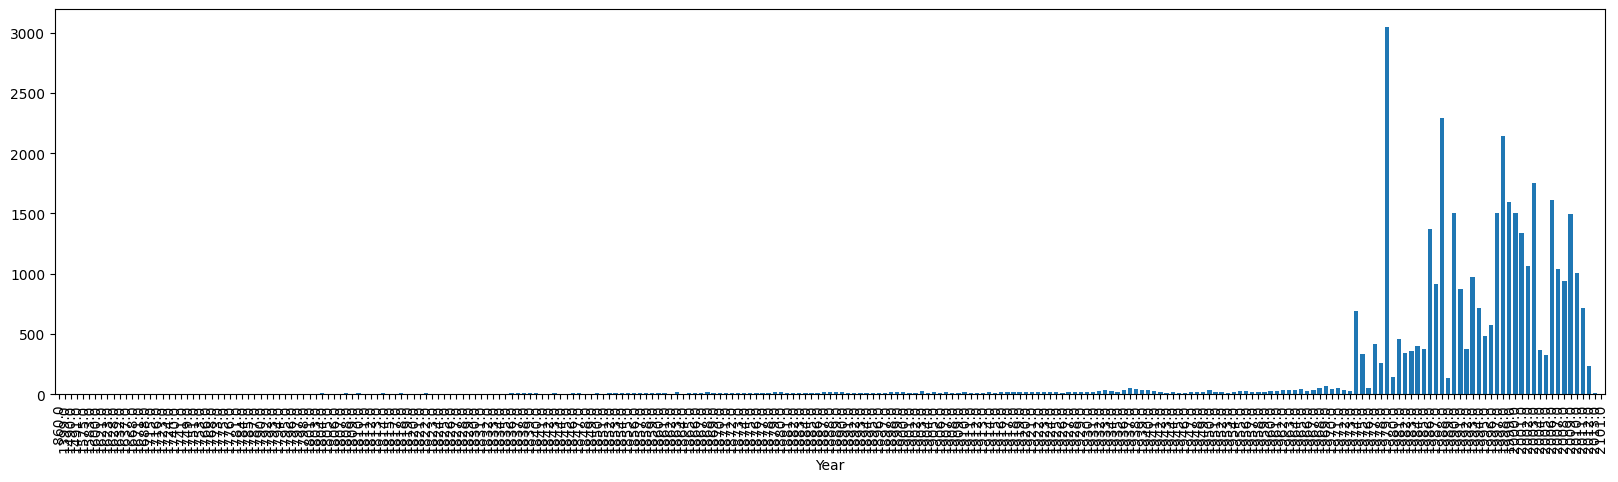

In [27]:
plt.figure(figsize=(20,5))
year_count_clean_meteorite_landings_df.plot(kind='bar', width=0.7)
plt.savefig("Total Number of Meteorite Landings in Years")
plt.show()